In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

/home/degelo/anaconda3/envs/kaggle_competition/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
train_df = pd.read_csv("data/train_clean.csv")
test_df = pd.read_csv("data/test_clean.csv")
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PassengerId   891 non-null    int64 
 1   Survived      891 non-null    int64 
 2   Pclass        891 non-null    int64 
 3   Sex           891 non-null    object
 4   Age           891 non-null    int64 
 5   SibSp         891 non-null    int64 
 6   Parch         891 non-null    int64 
 7   Embarked      891 non-null    object
 8   NumWomanWith  891 non-null    int64 
 9   Title         891 non-null    object
dtypes: int64(7), object(3)
memory usage: 69.7+ KB


In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,NumWomanWith,Title
0,1,0,3,male,1,1,0,S,0,Mr
1,2,1,1,female,2,1,0,C,1,Mrs
2,3,1,3,female,1,0,0,S,1,Miss
3,4,1,1,female,2,1,0,S,1,Mrs
4,5,0,3,male,2,0,0,S,0,Mr


In [4]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,NumWomanWith,Title
0,892,3,male,2,0,0,Q,0,Mr
1,893,3,female,2,1,0,S,1,Mrs
2,894,2,male,3,0,0,Q,0,Mr
3,895,3,male,1,0,0,S,0,Mr
4,896,3,female,1,1,1,S,1,Mrs


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PassengerId   891 non-null    int64 
 1   Survived      891 non-null    int64 
 2   Pclass        891 non-null    int64 
 3   Sex           891 non-null    object
 4   Age           891 non-null    int64 
 5   SibSp         891 non-null    int64 
 6   Parch         891 non-null    int64 
 7   Embarked      891 non-null    object
 8   NumWomanWith  891 non-null    int64 
 9   Title         891 non-null    object
dtypes: int64(7), object(3)
memory usage: 69.7+ KB


Durante a exploração dos dados, transformamos todas as features numéricas para variáveis categóricas. Por conta disso, utilizaremos o pd.get_dummies para fazer as transformações necessárias para utilizá-las nos nossos modelos.

In [6]:
train_df = pd.get_dummies(train_df, columns = ["Age", "Pclass", "Sex", "SibSp", "Parch", "Embarked", "NumWomanWith", "Title"], prefix=["Age", "Pclass", "Sex", "SibSp", "Parch", "Embarked", "NumWomanWith", "Title"], drop_first= True)
test_df = pd.get_dummies(test_df, columns = ["Age", "Pclass", "Sex", "SibSp", "Parch", "Embarked", "NumWomanWith", "Title"], prefix=["Age", "Pclass", "Sex", "SibSp", "Parch", "Embarked", "NumWomanWith", "Title"], drop_first=True)

In [7]:
X_train = train_df.drop(["PassengerId", "Survived"], axis = 1)
X_test = test_df.drop(["PassengerId"], axis =1)

y_train = train_df["Survived"]
X_train.head()

,Age_1,Age_2,Age_3,Age_4,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,...,Parch_3,Embarked_Q,Embarked_S,NumWomanWith_1,NumWomanWith_2,NumWomanWith_3,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,1,0,0,0,0,1,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0
4,0,1,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [8]:
X_test.head()

,Age_1,Age_2,Age_3,Age_4,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,...,Parch_3,Embarked_Q,Embarked_S,NumWomanWith_1,NumWomanWith_2,NumWomanWith_3,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0,1,0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0,1,0,0,0,1,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0
2,0,0,1,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,1,0,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,1,0,0,0,0,1,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0


In [9]:
params = { 'max_depth': [3, 5, 6, 7, 8, 10],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'reg_alpha': [0.05, 0.1, 1, 10, 100],
           'reg_lambda': [0.1, 1, 2,  10, 100],
           'n_estimators': [100, 500, 1000],
           }

model = xgb.XGBClassifier(use_label_encoder=False)
clf = RandomizedSearchCV(estimator=model,
                         param_distributions=params,
                         scoring="accuracy",
                         n_iter=25,
                         cv=5,
                         verbose=1)


In [10]:
clf.fit(X_train, y_train, eval_metric = "logloss")


Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                   param_distributions={'colsample_bylevel': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'colsample_bytree': array([0.4, 0.5, 0.6,

In [11]:
clf.score(X_train, y_train)

0.8372615039281706

In [12]:
clf.best_score_

0.8237712635741635

In [13]:
clf.best_params_

{'subsample': 0.7999999999999999,
 'reg_lambda': 0.1,
 'reg_alpha': 1,
 'n_estimators': 100,
 'max_depth': 10,
 'learning_rate': 0.01,
 'colsample_bytree': 0.6,
 'colsample_bylevel': 0.6}

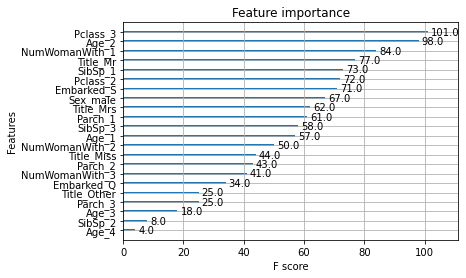

In [14]:
xgb.plot_importance(clf.best_estimator_)
plt.rcParams['figure.figsize'] = [11, 6]
plt.show()

In [15]:
y_test_pred = clf.predict(X_test)
test_df["Survived"] = y_test_pred

In [16]:
test_df[["PassengerId", "Survived"]].to_csv("data/predictions.csv", index = False)

The following model gave us a 78% accuracy in test set.